#**ML Assignment 2: Text Data**
**Group TN01 - Team SEML31**  
**Dataset:** [Sentiment140 dataset with 1.6 million tweets](https://www.kaggle.com/datasets/kazanova/sentiment140)

In [ ]:
# Set EXTRACT_FEATURE to True to re-extract feature (take an additional 7-10 minutes)
# When EXTRACT_FEATURE is False (default), the already extracted feature is downloaded from Google Drive
EXTRACT_FEATURE = False
TRAIN_MODEL = False

# 1. Download and Import Data

In [ ]:
!mkdir datasets
!curl -L -o ./datasets/sentiment140.zip\
  https://www.kaggle.com/api/v1/datasets/download/kazanova/sentiment140
!unzip -o ./datasets/sentiment140.zip -d ./datasets/
#data saved in '/content/datasets/'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 80.9M  100 80.9M    0     0  97.7M      0 --:--:-- --:--:-- --:--:-- 97.7M
Archive:  ./datasets/sentiment140.zip
  inflating: ./datasets/training.1600000.processed.noemoticon.csv  


In [ ]:
import numpy as np
import pandas as pd


csv_path = "./datasets/training.1600000.processed.noemoticon.csv"
df = pd.read_csv(csv_path, encoding='latin-1', header=None)
new_headers = ["target", "ids", "date", "flag", "user", "text"]
df.columns = new_headers
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# 2. EDA (Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Class distribution

In [ ]:
df["target"].value_counts()

,count
target,
0,800000
4,800000


The dataset of 1.6 million text is evenly divided between negative and positive sentimental label.

**Note:** Contrary to the [author's description](https://www.kaggle.com/datasets/kazanova/sentiment140/data#:~:text=have%20been%20annotated%20(-,0%20%3D%20negative%2C%202%20%3D%20neutral%2C%204%20%3D%20positive,-)%20and%20they%20can) (that there are 3 label, 0 is negative, 2 is neutral, 4 is positive), the dataset contains no label 2. The problem degrade into a binary classification.

## Distribution of text length
1. by number of words
2. by number of characters

In [ ]:
df["word_count"] = df["text"].apply(lambda x: len(x.split()))
df["char_count"] = df["text"].apply(len)

In [ ]:
# Distribution by number of words

df["word_count"].describe()

,word_count
count,1.600000e+06
mean,1.317615e+01
std,6.957978e+00
min,1.000000e+00
25%,7.000000e+00
50%,1.200000e+01
75%,1.900000e+01
max,6.400000e+01


In [ ]:
df["word_count"].value_counts().sort_index()

,count
word_count,
1,5978
2,25113
3,52064
4,67905
5,80835
6,87307
7,89283
8,88847
9,87014


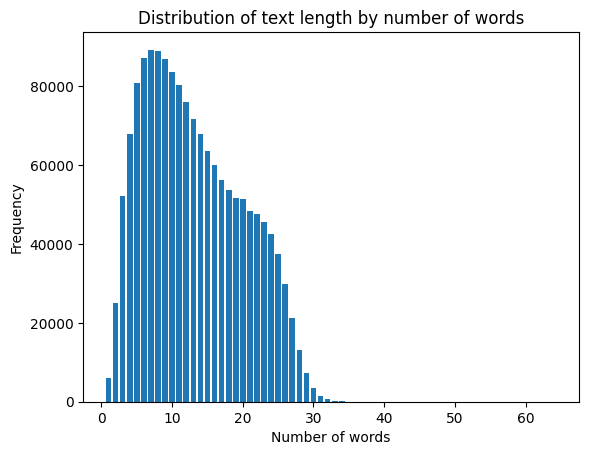

In [ ]:
import matplotlib.pyplot as plt


# plt.hist(df["word_count"], bins=100)
word_count_dist = df["word_count"].value_counts().sort_index()
plt.bar(word_count_dist.index, word_count_dist.values)
plt.title("Distribution of text length by number of words")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Distribution by number of characters

df["char_count"].describe()

,char_count
count,1.600000e+06
mean,7.409011e+01
std,3.644114e+01
min,6.000000e+00
25%,4.400000e+01
50%,6.900000e+01
75%,1.040000e+02
max,3.740000e+02


Number of bins: 359


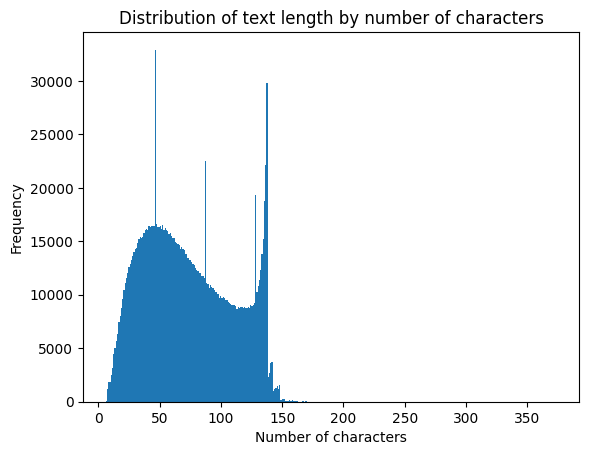

In [ ]:
_, bin_edge, _ = plt.hist(df["char_count"], bins="auto")
print(f"Number of bins: {len(bin_edge) - 1}")
plt.title("Distribution of text length by number of characters")
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.show()

## Word frequency
Before preprocessing result

In [ ]:
from collections import Counter


all_words = " ".join(df["text"]).lower().split()
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=["word", "freq"])
word_freq_df = word_freq_df.sort_values(by="freq", ascending=False)
word_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193584 entries, 40 to 554627
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   word    1193584 non-null  object
 1   freq    1193584 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 27.3+ MB


In [ ]:
# top 20 most frequent word
word_freq_df.head(20)

,word,freq
40,i,746635
15,to,560314
45,the,518734
5,a,376422
54,my,312846
30,and,295675
7,you,237766
19,is,231086
44,for,214051
112,in,209960


## Word cloud

In [ ]:
# from wordcloud import WordCloud

# wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()


# 3. Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Preprocess configurations:
* `lowercase`: Turn every alphabetical character to lowercase
* `link`: Remove URLs (www.example.com) from text.
* `user`: Remove usernames (@nguyen123) from text.
* `special_char`: Remove special characters (comma, period, question mark, quotation, bracket, etc.)
* `stop_word`: Remove words that have little meaning (a, an, the, etc.)
* `lemmatize`: Converts words to base form (learning -> learn, better -> good).

In [ ]:
from sklearn.model_selection import train_test_split


def clean_text(text, lowercase=True, link=True, user=True, special_char=True, stopword=True, lemmatize=True):
    if lowercase:
        text = text.lower()
    if link:
        text = re.sub(r"http\S+|www\S+", "", text)
    if user:
        text = re.sub(r"@\w+", "", text)
    if special_char:
        text = re.sub(r"[^a-z\s]", "", text)

    text = " ".join(text.split()) #   remove   extra   white        space
    words = text.split()
    if stopword:
        words = [
            word for word in words if word not in stop_words
            or word in ["no", "not", "never"]
        ]
    if lemmatize:
        words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


def preprocess(df, lowercase=True, link=True, user=True, special_char=True, stopword=True, lemmatize=True):
    df["text_clean"] = df["text"].apply(
        clean_text,
        args=(lowercase, link, user, special_char, stopword, lemmatize)
    )
    df["target_bool"] = df["target"].map({0: False, 4: True})

    return train_test_split(df["text_clean"], df["target_bool"], random_state=42)

# 4. Extract feature vector

We will only be training and testing using a subset (100 thousand sample) because the original dataset is too big (1.6 million sample)

In [ ]:
TOTAL_SAMPLE_SIZE = 100_000

df_small, _ = train_test_split(
    df,
    train_size=TOTAL_SAMPLE_SIZE,
    stratify=df['target'],
    random_state=42
)

In [ ]:
df_small['target'].value_counts()

,count
target,
4,50000
0,50000


To simplify and reduce training time, we will only be using 2 preprocess config: remove stop word vs keep stop word

In [ ]:
processed_0 = preprocess(
    df_small,
    lowercase=True,
    link=True,
    user=True,
    special_char=True,
    stopword=True, # remove stop words
    lemmatize=True
)

processed_1 = preprocess(
    df_small,
    lowercase=True,
    link=True,
    user=True,
    special_char=True,
    stopword=False, # keep stop words
    lemmatize=True
)


We use 2 methods to extract feature vector from the text
1. TF-IDF
2. BERT

In [ ]:
!mkdir features

In [ ]:
# TF-IDF with no stop word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy import sparse
import numpy as np

if EXTRACT_FEATURE:
    svd_model = TruncatedSVD(n_components = 300, random_state = 42)
    for i, num_features in enumerate([2500, 5000]):
        X_train, X_test, y_train, y_test = processed_0
        vectorizer = TfidfVectorizer(max_features=num_features, ngram_range=(1,2))
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
        sparse.save_npz(f"./features/X_train_tfidf_{num_features}.npz", X_train_tfidf)
        sparse.save_npz(f"./features/X_test_tfidf_{num_features}.npz", X_test_tfidf)

        X_train_svd = svd_model.fit_transform(X_train_tfidf)
        X_test_svd = svd_model.transform(X_test_tfidf)

        print(f"X_train_svd shape: {X_train_svd.shape}")
        print(f"X_test_svd shape: {X_test_svd.shape}")

        np.save(f"./features/X_train_svd_{num_features}.npy", X_train_svd)
        np.save(f"./features/X_test_svd_{num_features}.npy", X_test_svd)


In [ ]:
# BERT
import torch
from transformers import AutoTokenizer, AutoModel

if EXTRACT_FEATURE:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model_name = "bert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    model.to(device)
    model.eval()

In [ ]:
import math

if EXTRACT_FEATURE:

    BATCH_SIZE = 1024
    print(f"Vectorizing text dataset configure")
    X_train, X_test, y_train, y_test = processed_1
    num_train_batch = math.ceil(len(X_train) / BATCH_SIZE)
    num_test_batch = math.ceil(len(X_test) / BATCH_SIZE)

    train_embeds = []
    print(f"Number of batch: {num_train_batch}")
    for batch in range(num_train_batch):
        start_idx = batch * BATCH_SIZE
        end_idx = len(X_train) if batch == num_train_batch - 1 else (batch + 1) * BATCH_SIZE

        inputs = tokenizer(
            list(X_train[start_idx: end_idx]),
            padding=True,
            truncation=True,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        attention_mask = inputs.attention_mask.unsqueeze(-1)
        token_sum = (outputs.last_hidden_state * attention_mask).sum(dim=1)
        mask_sum = attention_mask.sum(dim=1)
        mean_embeddings = token_sum / mask_sum

        train_embeds.append(mean_embeddings.cpu().numpy())
        print('.', end='')
    train_embeds = np.concatenate(train_embeds, axis=0)
    np.save("./features/X_train_bert.npy", train_embeds)
    print()


    test_embeds = []
    print(f"Number of batch: {num_test_batch}")
    for batch in range(num_test_batch):
        start_idx = batch * BATCH_SIZE
        end_idx = len(X_test) if batch == num_test_batch - 1 else (batch + 1) * BATCH_SIZE

        inputs = tokenizer(
            list(X_test[start_idx: end_idx]),
            padding=True,
            truncation=True,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        attention_mask = inputs.attention_mask.unsqueeze(-1)
        token_sum = (outputs.last_hidden_state * attention_mask).sum(dim=1)
        mask_sum = attention_mask.sum(dim=1)
        mean_embeddings = token_sum / mask_sum

        test_embeds.append(mean_embeddings.cpu().numpy())
        print('.', end='')
    test_embeds = np.concatenate(test_embeds, axis=0)
    np.save("./features/X_test_bert.npy", test_embeds)
    print()
    print()


In [ ]:
import gdown
import subprocess


if not EXTRACT_FEATURE:
    url = "https://drive.google.com/file/d/16v7Ykd4Dv28Fd-K_DTqbXoGR05iV5ss3/view?usp=sharing"
    output = "ML_Assig2_Text_Features.zip"
    gdown.download(url=url, output=output, fuzzy=True)
    result = subprocess.run(
        ["unzip", output, "-d", "./features"],    # command and arguments as a list
        capture_output=True,           # capture stdout and stderr
        text=True                      # return output as string
    )

Downloading...
From (original): https://drive.google.com/uc?id=16v7Ykd4Dv28Fd-K_DTqbXoGR05iV5ss3
From (redirected): https://drive.google.com/uc?id=16v7Ykd4Dv28Fd-K_DTqbXoGR05iV5ss3&confirm=t&uuid=24a68a23-9579-4e19-970e-12e17c36c35a
To: /content/ML_Assig2_Text_Features.zip
100%|██████████| 749M/749M [00:21<00:00, 35.0MB/s]


# 5. Modeling
There are 3 feature extraction technique TF-IDF with no stop word with max_features 2500 and 5000, and BERT with stop words. We have another option is that applying SVD for TF-IDF features. Therefore, there are a total of 5 configuration for feature extraction.



The extracted features files are stored inside `features/`

I will use the configuration number in the model configuration also

| Configuration | File Names                                | Processing                  | Feature Extraction |
|------|-------------------------------------------|-----------------------------|--------------------|
| 1    | `X_train_tfidf_2500.npz`, `X_test_tfidf_2500.npz` | processed_0 (no stop words) | TF-IDF (max_features = 2500)             |
| 2    | `X_train_tfidf_5000.npz`, `X_test_tfidf_5000.npz` | processed_0 (no stop words) | TF-IDF (max_features = 5000)           |
| 3    | `X_train_svd_2500.npz`, `X_test_svd_2500.npz` | processed_0 (no stop words) | TF-IDF (max_features = 2500) + SVD (n_components = 300)            |
| 4    | `X_train_svd_5000.npz`, `X_test_svd_5000.npz` | processed_0 (no stop words) | TF-IDF (max_features = 5000) + SVD (n_components = 300)          |
| 5    | `X_train_bert_1.npy`, `X_test_bert_1.npy`   | processed_1 (keep stop words) | BERT             |
           



Load feature files to memory:
* To load a `.npz` file (TF-IDF features extract):
    ```python
    X_train = sparse.load_npz("./features/X_train_tfidf_2500.npz")
    ```

* To load a `.npy` file (BERT or SVD features extract):
    ```python
    X_train = np.load("./features/X_train_bert.npz")
    ```
* To load a

* The $y$ labels (True/False) are stored in `processed_0` and `processed_1`:
    ```python
    _, _, y_train, y_test = processed_0
    ```

In [ ]:
# Example: Loading configuration 1 (tf-idf, max_features = 2500)

feature_path = "./features/ML_Assig2_Text_Features"

_, _, y_train, y_test = processed_0

processed_data = []
for preprocessing_type in ["tfidf_2500", "tfidf_5000"]:
  X_train = sparse.load_npz(f"{feature_path}/X_train_{preprocessing_type}.npz")
  X_test = sparse.load_npz(f"{feature_path}/X_test_{preprocessing_type}.npz")
  processed_data.append((preprocessing_type, X_train, X_test))

for preprocessing_type in ["svd_2500", "svd_5000", "bert"]:
  X_train = np.load(f"{feature_path}/X_train_{preprocessing_type}.npy")
  X_test = np.load(f"{feature_path}/X_test_{preprocessing_type}.npy")
  processed_data.append((preprocessing_type, X_train, X_test))

## Overall
**Models to use**

`Linear Model with no SVD and C = {0.5, 1, 2}`

1. LogisticRegression

2. LinearSVC
  
    TF-IDF 2500 and 5000, and BERT

    -> 3 x 3 x 2 models

`Tree-based Model with n_estimators = {50, 100}`

Use validation split and early_stopping_rounds=30

3. RandomForest

    For TF-IDF with SVD 300

    -> 2 x 2 models

4. XGBoost / LightGBM

    For TF-IDF with SVD 300 + BERT

    -> 3 x 2 models

`MLP`

5. MLP for BERT

    hidden layers [256, 32]

6. MLP for TF-IDF 5000 only

    SVD(300)

    hidden layers [128,32]


**Total number of models**

    30 models

    Metrics: Accuracy, Recall, Precision, F1-score, AUC-ROC


**Strategy**

    Run on Linear Model first, then Tree-based, then MLP

## Traditional model




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


logistic_config = [{'C' : c, 'random_state' : 42, 'max_iter': 1000} for c in [0.5, 1, 2]] # Increase max_iter for convergence
linearsvc_config = [{'C' : c, 'random_state' : 42} for c in [0.5, 1, 2]]
forest_config = [{'n_estimators': n, 'random_state' : 42} for n in [50, 100]]
boost_config = [{ 'n_estimators': n , 'random_state' : 42} for n in [50, 100]]

models = {
    'Logistic Regression' : (LogisticRegression, logistic_config),
    'Linear SVC' : (LinearSVC, linearsvc_config),
    'Random Forest' : (RandomForestClassifier, forest_config),
    'XGBoost' : (XGBClassifier, boost_config)
}


In [ ]:
import time

model_result = pd.DataFrame(columns = [
    "classifier",
    "model_config",
    "preprocessing",
    "accuracy",
    "precision",
    "recall",
    "f1"
])


if TRAIN_MODEL:
  for name, (classifier, model_configs) in models.items():
    print(f"Training {name}")
    start_time = time.time()

    for model_config in model_configs:
      model = classifier(**model_config)

      for processing_type, X_train, X_test in processed_data:
        if (name == "Logistic Regression" or  name == "Linear SVC") and ("svd" in processing_type):
          continue
        elif (name == "Random Forest" or  name == "XGBoost") and ("tfidf" in processing_type):
          continue
        elif (name == "Random Forest" and "bert" in processing_type):
          continue

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_pred, y_test)
        precision = precision_score(y_pred, y_test)
        recall = recall_score(y_pred, y_test)
        f1 = f1_score(y_pred, y_test)

        model_result.loc[len(model_result)] = [
                    name,
                    list(model_config.values())[0],
                    processing_type,
                    accuracy, precision, recall, f1
                ]

        print(".", end='')

    training_time = int(time.time() - start_time)
    print(f"Done training with {training_time // 60} minutes, {training_time % 60} seconds \n")
else:
  print("Skip training :< Nahhh")

Skip training :< Nahhh


## Deep learning model


### Configuration

In [ ]:
out_features = 1
p_drop_out = 0.1
max_epochs = 75
batch_size = 64

tolerance = 1e-5
patience = 5

### Model Architecture

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

class MLP(nn.Module):
  def __init__(self, feature_name, in_features, p_drop_out = 0.1):
    super().__init__()


    if feature_name == "bert":
      self.stack_layers = nn.Sequential(
          nn.Linear(in_features, 256),
          nn.ReLU(),
          nn.Dropout(p = p_drop_out),

          nn.Linear(256, 32),
          nn.ReLU(),
          nn.Dropout(p = p_drop_out),

          nn.Linear(32, 1)
      )

    elif feature_name == "svd":
      self.stack_layers = nn.Sequential(
          nn.Linear(in_features, 128),
          nn.ReLU(),
          nn.Dropout(p = p_drop_out),

          nn.Linear(128, 32),
          nn.ReLU(),
          nn.Dropout(p = p_drop_out),

          nn.Linear(32, 1)
      )
    else:
      print("Unable to create model, you should use bert or svd features")

  def forward(self, x):
    logits = self.stack_layers(x)
    return logits

In [ ]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader

class Sentiment140(Dataset):
  def __init__(self, X, y):
    super().__init__()
    self.X = X
    # Ensure y is explicitly a numpy array for consistent positional indexing
    self.y = np.array(y)

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, i):
    X_i = torch.from_numpy(self.X[i]).float()
    y_i = torch.tensor(self.y[i], dtype = torch.float32)
    return X_i, y_i

In [ ]:
def train(model, dataloader, loss_fn, optimizer):
  model.train()
  for X, y in dataloader:
    pred = model(X).squeeze()
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

def test(model, dataloader, loss_fn):
  model.eval()
  test_loss, correct = 0, 0

  num_batch = len(dataloader)
  data_size = len(dataloader.dataset)

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X).squeeze()
      test_loss += loss_fn(pred, y).item()
      pred_prob = torch.sigmoid(pred)
      pred_class = (pred_prob > 0.5).float()
      correct += (pred_class == y).float().sum().item()

  test_loss /= num_batch
  correct /= data_size

  print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f}\n")
  return test_loss, correct

### Loss and Optimization Configuration

In [ ]:
_, bert_X_train, bert_X_test = processed_data[-1]
_, svd_5000_X_train, svd_5000_X_test = processed_data[-2]

print("svd_5000_X_train.shape", svd_5000_X_train.shape)
print("svd_5000_X_test.shape", svd_5000_X_test.shape)
print("bert_X_train.shape", bert_X_train.shape)
print("bert_X_test.shape", bert_X_test.shape)

svd_5000_X_train.shape (75000, 300)
svd_5000_X_test.shape (25000, 300)
bert_X_train.shape (75000, 768)
bert_X_test.shape (25000, 768)


In [ ]:
from torch.optim import SGD
from sklearn.model_selection import train_test_split

if TRAIN_MODEL:
  print("Training MLP")
  start_time = time.time()

  for feature_name, X_original_train, X_test in [("bert", bert_X_train, bert_X_test), ("svd", svd_5000_X_train, svd_5000_X_test)]:

    # Initialization and configuration
    X_train, X_val, y_train_split, y_val_split = train_test_split(X_original_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    train_set = Sentiment140(X_train, y_train_split)
    validation_set = Sentiment140(X_val, y_val_split)
    test_set = Sentiment140(X_test, y_test)

    train_dataloader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
    validation_dataloader = DataLoader(validation_set, batch_size = batch_size)
    test_dataloader = DataLoader(test_set, batch_size = batch_size)

    model = MLP(feature_name, X_train.shape[1], p_drop_out)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(),
                                lr = 5e-3,
                                momentum= 0.9,
                                weight_decay= 1e-5)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size = 15,
                                                gamma = 0.2)

    loss_list = []
    best_loss = 100 # Just a relative large loss number
    num_patience = 0
    best_accuracy = 0.0 # Initialize best accuracy

    # Training
    for epoch in range(max_epochs):
      train(model, train_dataloader, loss_fn, optimizer)
      test_loss, accuracy = test(model, validation_dataloader, loss_fn)

      loss_list.append(test_loss)
      scheduler.step()

      if test_loss < best_loss - tolerance:
        best_loss = test_loss
        best_accuracy = accuracy
        print("----Save best model------")
        torch.save(model.state_dict(), f"./features/{feature_name}_mlp.pth")
        num_patience = 0
      else:
        num_patience += 1
        if num_patience == patience:
          print(f"Early stopping at epoch {epoch} with best loss {test_loss:>8f}, and accuracy {(100*best_accuracy):>0.1f}%")
          break

    # Evaluating
    logits = model(torch.from_numpy(X_test).float())
    pred_prob = torch.sigmoid(logits)
    pred_class = (pred_prob > 0.5).float()

    accuracy = accuracy_score(pred_class, y_test)
    precision = precision_score(pred_class, y_test)
    recall = recall_score(pred_class, y_test)
    f1 = f1_score(pred_class, y_test)

    model_result.loc[len(model_result)] = [
        "MLP",
        "Dropout + Scheduler + Early Stopping",
        feature_name,
        accuracy, precision, recall, f1
    ]

    pd.Series(loss_list).plot()
    plt.title(f"Validation Loss for {feature_name} MLP")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

  training_time = int(time.time() - start_time)
  print(f"MLP Training with {training_time // 60} minutes, {training_time % 60} seconds\n")

## Comparing models

In [ ]:
# model_result.to_csv("model_result.csv")
# model_result

In [ ]:
import gdown

if not TRAIN_MODEL:
    csv_url = "https://drive.google.com/file/d/17P1smvYVYgVB5tzQOGXo-z58CXykIsTS/view?usp=sharing"
    csv_filename = "model_result.csv"
    gdown.download(csv_url, output=csv_filename, fuzzy=True)
    model_result = pd.read_csv(csv_filename)

Downloading...
From: https://drive.google.com/uc?id=17P1smvYVYgVB5tzQOGXo-z58CXykIsTS
To: /content/model_result.csv
100%|██████████| 2.85k/2.85k [00:00<00:00, 11.7MB/s]


In [ ]:
def highlight_row(row, idx):
    if row.name == idx:
        return ["background-color: yellow"] * len(row)
    else:
        return [""] * len(row)

In [ ]:
from IPython.display import display

model_names = [*models.keys(), "MLP"]
model_max_f1 = []
for name in model_names:
    df_result = model_result[model_result["classifier"] == name]
    max_f1_row_idx = df_result["f1"].idxmax()
    model_max_f1.append(max_f1_row_idx)
    styled_result = df_result.style.apply(highlight_row, axis=1, idx=max_f1_row_idx)

    print(f"{name} result:")
    display(styled_result)
    print(f"=> The best configuration for {name} is:")
    print("* Model config")
    if name == "MLP":
        print(f"  - num_hidden: {df_result.loc[max_f1_row_idx, 'model_config']}")
    else:
        print(f"  - {list(models[name][1][0].keys())[0]}: {df_result.loc[max_f1_row_idx, 'model_config']}")

    print("* Preprocess config")
    for preprocess_type in ["preprocessing"]:
        print(f"  - {preprocess_type}: {df_result.loc[max_f1_row_idx, preprocess_type]}")

    print()

Logistic Regression result:


,classifier,model_config,preprocessing,accuracy,precision,recall,f1
0,Logistic Regression,0.5,tfidf_2500,0.772080,0.791109,0.763494,0.777056
1,Logistic Regression,0.5,tfidf_5000,0.776040,0.794057,0.767814,0.780715
2,Logistic Regression,0.5,bert,0.783440,0.786568,0.783074,0.784817
3,Logistic Regression,1.0,tfidf_2500,0.772840,0.792543,0.763879,0.777947
4,Logistic Regression,1.0,tfidf_5000,0.777760,0.795650,0.769533,0.782374
5,Logistic Regression,1.0,bert,0.783120,0.786488,0.782622,0.784551
6,Logistic Regression,2.0,tfidf_2500,0.771960,0.792862,0.762430,0.777348
7,Logistic Regression,2.0,tfidf_5000,0.778160,0.796208,0.769835,0.782799
8,Logistic Regression,2.0,bert,0.783080,0.785931,0.782874,0.784399


=> The best configuration for Logistic Regression is:
* Model config
  - C: 0.5
* Preprocess config
  - preprocessing: bert

Linear SVC result:


,classifier,model_config,preprocessing,accuracy,precision,recall,f1
9,Linear SVC,0.5,tfidf_2500,0.770200,0.795172,0.758723,0.776520
10,Linear SVC,0.5,tfidf_5000,0.775000,0.796208,0.765179,0.780385
11,Linear SVC,0.5,bert,0.783920,0.788321,0.782832,0.785567
12,Linear SVC,1.0,tfidf_2500,0.769160,0.794296,0.757656,0.775544
13,Linear SVC,1.0,tfidf_5000,0.772440,0.793101,0.763011,0.777765
14,Linear SVC,1.0,bert,0.783920,0.788321,0.782832,0.785567
15,Linear SVC,2.0,tfidf_2500,0.769040,0.794057,0.757601,0.775401
16,Linear SVC,2.0,tfidf_5000,0.771000,0.791985,0.761471,0.776428
17,Linear SVC,2.0,bert,0.783920,0.788400,0.782788,0.785584


=> The best configuration for Linear SVC is:
* Model config
  - C: 2.0
* Preprocess config
  - preprocessing: bert

Random Forest result:


,classifier,model_config,preprocessing,accuracy,precision,recall,f1
18,Random Forest,50.0,svd_2500,0.705640,0.689133,0.714463,0.701569
19,Random Forest,50.0,svd_5000,0.708720,0.686663,0.720170,0.703018
20,Random Forest,100.0,svd_2500,0.715960,0.707138,0.721567,0.714280
21,Random Forest,100.0,svd_5000,0.719120,0.702597,0.728361,0.715247


=> The best configuration for Random Forest is:
* Model config
  - n_estimators: 100.0
* Preprocess config
  - preprocessing: svd_5000

XGBoost result:


,classifier,model_config,preprocessing,accuracy,precision,recall,f1
22,XGBoost,50.0,svd_2500,0.724240,0.742989,0.717716,0.730134
23,XGBoost,50.0,svd_5000,0.728240,0.738289,0.725344,0.731759
24,XGBoost,50.0,bert,0.756320,0.757887,0.757043,0.757465
25,XGBoost,100.0,svd_2500,0.726000,0.743467,0.719951,0.731520
26,XGBoost,100.0,svd_5000,0.731440,0.743228,0.727691,0.735378
27,XGBoost,100.0,bert,0.762120,0.762110,0.763631,0.762869


=> The best configuration for XGBoost is:
* Model config
  - n_estimators: 100.0
* Preprocess config
  - preprocessing: bert

MLP result:


,classifier,model_config,preprocessing,accuracy,precision,recall,f1
28,MLP,Dropout + Scheduler + Early Stopping,bert,0.790880,0.773821,0.802595,0.787945
29,MLP,Dropout + Scheduler + Early Stopping,svd,0.743680,0.752390,0.741055,0.746679


=> The best configuration for MLP is:
* Model config
  - num_hidden: Dropout + Scheduler + Early Stopping
* Preprocess config
  - preprocessing: bert



In [ ]:
max_f1_models = model_result.loc[model_max_f1]
best_model_idx = max_f1_models["f1"].idxmax()
max_f1_styled = max_f1_models.style.apply(highlight_row, axis=1, idx=best_model_idx)

print(f"The model with the highest f1-score is {model_result.loc[best_model_idx, 'classifier']}.")
max_f1_styled

The model with the highest f1-score is MLP.


,classifier,model_config,preprocessing,accuracy,precision,recall,f1
2,Logistic Regression,0.5,bert,0.783440,0.786568,0.783074,0.784817
17,Linear SVC,2.0,bert,0.783920,0.788400,0.782788,0.785584
21,Random Forest,100.0,svd_5000,0.719120,0.702597,0.728361,0.715247
27,XGBoost,100.0,bert,0.762120,0.762110,0.763631,0.762869
28,MLP,Dropout + Scheduler + Early Stopping,bert,0.790880,0.773821,0.802595,0.787945


Một số đánh giá sơ bộ:

- Với các mô hình Linear, C nhỏ hơn có mức tăng về accuracy nhẹ, ~ 0.005.

- Với mô hình Tree-based, tăng n_estimators, có mức tăng accuracy ~ 0.01 - 0.005

- TF-IDF 5000 có mức tăng accuracy nhẹ so với TF-IDF 2500 ~0.005. Nhưng bù lại là train lâu :<

- Về chung BERT vẫn outplay, có mức tăng khoảng từ 0.005 đến 0.03 owr cacs classifier tương ứng. Trong đó, với classifier MLP, BERT embeddings cho ra kết quả tốt nhất với thời gian train phù hợp
